In [1]:
# Import required libraries
from sklearn.svm import SVC
from sklearn.decomposition import PCA
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

In [2]:
# Load a subset with 1000 instances of the MNIST digits dataset
digits = pd.read_csv('https://static-resources.zybooks.com/MachineLearning/digits.csv')
digits_sample = digits.sample(7000, random_state=246)

In [3]:
# Subset input and output features
X = digits_sample.iloc[:,:-1]
y = digits_sample[['class']]

In [4]:
# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1234)

In [5]:
# Create a pipeline that fits an SVC model to training data
clf = SVC(class_weight='balanced')
clf.fit(X_train, np.ravel(y_train))

SVC(class_weight='balanced')

In [6]:
# Display accuracy of the classifier using the test set
clf.score(X_test, y_test)

0.9480952380952381

In [7]:
# Create a principal component analysis model with 64 components
pca_64 = PCA(n_components=64)
scaler = MinMaxScaler()
pipeline_pca_64 = Pipeline(steps=[('scaler',scaler),('pca_64',pca_64), ('clf',clf)])
pipeline_pca_64.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca_64', PCA(n_components=64)),
                ('clf', SVC(class_weight='balanced'))])

Text(0, 0.5, 'Explained variance')

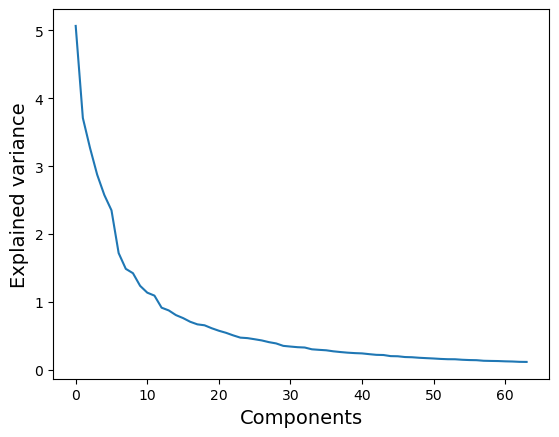

In [8]:
# Scree plot
plt.plot(pca_64.explained_variance_)
plt.xlabel('Components', size=14)
plt.ylabel('Explained variance', size=14)

In [9]:
# Create a principal component analysis model with 20 components
pca_20 = PCA(n_components=20)
pipeline_pca_20 = Pipeline(steps=[('scaler',scaler),('pca_20',pca_20), ('clf',clf)])
pipeline_pca_20.fit(X_train, np.ravel(y_train))

Pipeline(steps=[('scaler', MinMaxScaler()), ('pca_20', PCA(n_components=20)),
                ('clf', SVC(class_weight='balanced'))])

In [10]:
# Display accuracy of the classifier using the 20 principal components
pipeline_pca_20.score(X_test, y_test)

0.9476190476190476

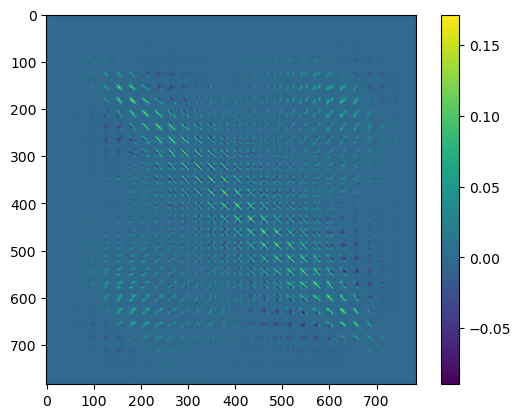

In [11]:
# Visualize the covariance matrix using a heatmap
fig,ax = plt.subplots(1)
p = plt.imshow(pca_20.get_covariance(), cmap='viridis')
fig.colorbar(p,ax=ax)
plt.show()

In [12]:
# Display covariance matrix
np.round(pd.DataFrame(pca_20.get_covariance()),4)

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,0.0246,-0.0000,-0.0000,0.0000,0.0000,-0.0,-0.0,0.0,0.0,0.0,...,-0.0,-0.0,-0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
1,-0.0000,0.0246,0.0000,0.0000,0.0000,0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
2,-0.0000,0.0000,0.0246,0.0000,0.0000,0.0,-0.0,-0.0,-0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
3,0.0000,0.0000,0.0000,0.0246,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,-0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
4,0.0000,0.0000,0.0000,0.0000,0.0246,0.0,0.0,-0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0000,0.0000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
779,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0246,0.0000,0.0000,0.0000,0.0000
780,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0246,0.0000,0.0000,0.0000
781,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0246,0.0000,0.0000
782,0.0000,0.0000,0.0000,0.0000,0.0000,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0000,0.0000,0.0000,0.0246,0.0000


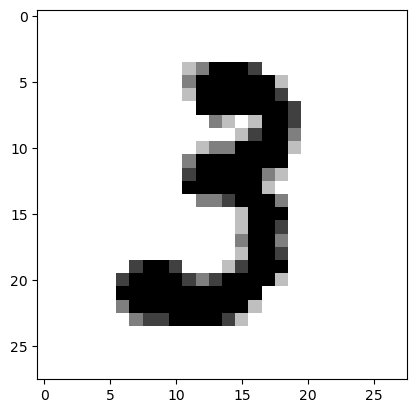

In [13]:
# Display the original image for an instance
image_original = X_train.iloc[4,:].to_numpy()
image_original = image_original.reshape([28,28])
plt.imshow(image_original, cmap=plt.cm.gray_r)

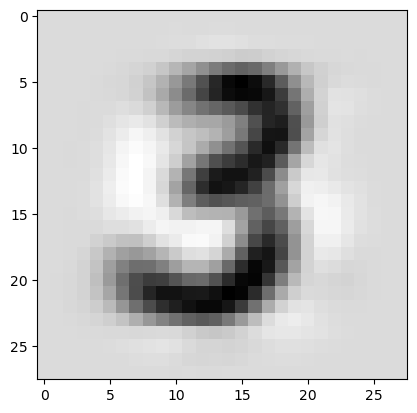

In [14]:
# Display the transformed image of the same instance
digits_pca_reduced = pca_20.fit_transform(X_train)
digits_pca_recovered = pca_20.inverse_transform(digits_pca_reduced)
image_pca = digits_pca_recovered[4,:].reshape([28,28])
plt.imshow(image_pca, cmap=plt.cm.gray_r)

In [15]:
# Display the principal components
pd.DataFrame(np.round(pca_20.components_,4))

,0,1,2,3,4,5,6,7,8,9,...,774,775,776,777,778,779,780,781,782,783
0,-0.0,-0.0,0.0,0.0,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,...,-0.0001,0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0007,0.0003,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
2,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,...,-0.0006,-0.0002,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,-0.0,0.0,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.0001,-0.0000,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,-0.0,-0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,...,-0.0008,-0.0003,-0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,...,-0.0002,-0.0000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,-0.0,0.0,-0.0,-0.0,0.0,-0.0,0.0,-0.0,-0.0,0.0,...,-0.0005,-0.0002,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
7,0.0,-0.0,0.0,0.0,-0.0,0.0,-0.0,0.0,0.0,0.0,...,0.0016,0.0007,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
8,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.0,-0.0,-0.0,...,0.0009,0.0005,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0
9,-0.0,-0.0,0.0,-0.0,-0.0,-0.0,-0.0,-0.0,0.0,-0.0,...,-0.0001,0.0001,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0,-0.0


In [16]:
# Display the amount of variance explained by the principal components
np.round(pca_20.explained_variance_,4)

array([329315.3462, 241189.5551, 212530.4402, 186943.7591, 167484.9853,
       152794.1614, 111875.8973,  96780.9944,  92620.7023,  80524.8565,
        73999.5954,  71157.0779,  59620.6139,  56990.4202,  52529.4921,
        49658.5709,  46116.3911,  43659.2393,  42761.4659,  39931.4036])

In [17]:
# Display the percentage variance explained by the principal components
np.round(pca_20.explained_variance_ratio_,4)

array([0.0961, 0.0704, 0.062 , 0.0545, 0.0489, 0.0446, 0.0326, 0.0282,
       0.027 , 0.0235, 0.0216, 0.0208, 0.0174, 0.0166, 0.0153, 0.0145,
       0.0135, 0.0127, 0.0125, 0.0117])